In [1]:
import re
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
poems = []
with open('data.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        poem_content = row['content']
        poems.append(poem_content)

In [3]:
poems = [re.sub(r'[^\w\s]', '', poem) for poem in poems]
poems

['\n平林漠漠烟如织寒山一带伤心碧暝色入高楼有人楼上愁玉阶空伫立宿鸟归飞急何处是归程长亭更短亭\n',
 '\n箫声咽秦娥梦断秦楼月秦楼月年年柳色灞陵伤别乐游原上清秋节咸阳古道音尘绝音尘绝西风残照汉家陵阙\n',
 '\n秋风清秋月明落叶聚还散寒鸦栖复惊相思相见知何日此时此夜难为情入我相思门知我相思苦长相思兮长相忆短相思兮无穷极早知如此绊人心何如当初莫相识\n',
 '\n西塞山前白鹭飞桃花流水鳜鱼肥青箬笠绿蓑衣斜风细雨不须归\n',
 '\n边草边草边草尽来兵老山南山北雪晴 千里万里月明明月明月胡笳一声愁绝\n',
 '\n团扇团扇美人病来遮面玉颜憔悴三年谁复商量管弦弦管弦管春草昭阳路断\n',
 '\n山桃红花满上头蜀江春水拍山流花红易衰似郎意水流无限似侬愁\n',
 '\n斑竹枝斑竹枝泪痕点点寄相思楚客欲听瑶瑟怨潇湘深夜月明时\n',
 '\n江南好风景旧曾谙日出江花红胜火春来江水绿如蓝能不忆江南\n',
 '江南好风景旧曾谙日出江花红胜火春来江水绿如蓝能不忆江南江南忆最忆是杭州山寺月中寻桂子郡亭枕上看潮头何日更重游江南忆其次忆吴宫吴酒一杯春竹叶吴娃双舞醉芙蓉早晚复相逢',
 '\n汴水流泗水流流到瓜州古渡头吴山点点愁思悠悠恨悠悠恨到归时方始休月明人倚楼\n',
 '\n花非花雾非雾夜半来天明去来如春梦几多时去似朝云无觅处\n',
 '\n借问江潮与海水何似君情与妾心相恨不如潮有信相思始觉海非深\n',
 '\n菡萏香连十顷陂小姑贪戏采莲迟晚来弄水船头湿更脱红裙裹鸭儿\n',
 '\n兰烬落屏上暗红蕉闲梦江南梅熟日夜船吹笛雨萧萧人语驿边桥\n',
 '\n梳洗罢独倚望江楼过尽千帆皆不是斜晖脉脉水悠悠肠断白蘋洲\n',
 '\n小山重叠金明灭鬓云欲度香腮雪懒起画蛾眉弄妆梳洗迟照花前后镜花面交相映新帖绣罗襦双双金鹧鸪\n',
 '\n柳丝长春雨细花外漏声迢递惊塞雁起城乌画屏金鹧鸪香雾薄透帘幕惆怅谢家池阁红烛背绣帘垂梦长君不知\n',
 '\n红楼别夜堪惆怅香灯半卷流苏帐残月出门时美人和泪辞琵琶金翠羽弦上黄莺语劝我早还家绿窗人似花\n',
 '\n人人尽说江南好游人只合江南老春水碧于天画船听雨眠垆边人似月皓腕凝霜雪未老莫还乡还乡须断肠\n',
 '\n劝君今夜须沉醉尊前莫话明朝事珍重主人心酒深情亦深须愁春漏短莫诉金杯满遇酒且呵呵人生能几何\n',
 '\n四月十七

In [4]:
poems = [re.sub(r'[\s\n]', '', poem) for poem in poems]
poems

['平林漠漠烟如织寒山一带伤心碧暝色入高楼有人楼上愁玉阶空伫立宿鸟归飞急何处是归程长亭更短亭',
 '箫声咽秦娥梦断秦楼月秦楼月年年柳色灞陵伤别乐游原上清秋节咸阳古道音尘绝音尘绝西风残照汉家陵阙',
 '秋风清秋月明落叶聚还散寒鸦栖复惊相思相见知何日此时此夜难为情入我相思门知我相思苦长相思兮长相忆短相思兮无穷极早知如此绊人心何如当初莫相识',
 '西塞山前白鹭飞桃花流水鳜鱼肥青箬笠绿蓑衣斜风细雨不须归',
 '边草边草边草尽来兵老山南山北雪晴千里万里月明明月明月胡笳一声愁绝',
 '团扇团扇美人病来遮面玉颜憔悴三年谁复商量管弦弦管弦管春草昭阳路断',
 '山桃红花满上头蜀江春水拍山流花红易衰似郎意水流无限似侬愁',
 '斑竹枝斑竹枝泪痕点点寄相思楚客欲听瑶瑟怨潇湘深夜月明时',
 '江南好风景旧曾谙日出江花红胜火春来江水绿如蓝能不忆江南',
 '江南好风景旧曾谙日出江花红胜火春来江水绿如蓝能不忆江南江南忆最忆是杭州山寺月中寻桂子郡亭枕上看潮头何日更重游江南忆其次忆吴宫吴酒一杯春竹叶吴娃双舞醉芙蓉早晚复相逢',
 '汴水流泗水流流到瓜州古渡头吴山点点愁思悠悠恨悠悠恨到归时方始休月明人倚楼',
 '花非花雾非雾夜半来天明去来如春梦几多时去似朝云无觅处',
 '借问江潮与海水何似君情与妾心相恨不如潮有信相思始觉海非深',
 '菡萏香连十顷陂小姑贪戏采莲迟晚来弄水船头湿更脱红裙裹鸭儿',
 '兰烬落屏上暗红蕉闲梦江南梅熟日夜船吹笛雨萧萧人语驿边桥',
 '梳洗罢独倚望江楼过尽千帆皆不是斜晖脉脉水悠悠肠断白蘋洲',
 '小山重叠金明灭鬓云欲度香腮雪懒起画蛾眉弄妆梳洗迟照花前后镜花面交相映新帖绣罗襦双双金鹧鸪',
 '柳丝长春雨细花外漏声迢递惊塞雁起城乌画屏金鹧鸪香雾薄透帘幕惆怅谢家池阁红烛背绣帘垂梦长君不知',
 '红楼别夜堪惆怅香灯半卷流苏帐残月出门时美人和泪辞琵琶金翠羽弦上黄莺语劝我早还家绿窗人似花',
 '人人尽说江南好游人只合江南老春水碧于天画船听雨眠垆边人似月皓腕凝霜雪未老莫还乡还乡须断肠',
 '劝君今夜须沉醉尊前莫话明朝事珍重主人心酒深情亦深须愁春漏短莫诉金杯满遇酒且呵呵人生能几何',
 '四月十七正是去年今日别君时忍泪佯低面含羞半敛眉不知魂已断空有梦相随除却天边月没人知',
 '昨夜夜半枕上分明梦见语多时依旧桃花面频低柳叶眉半羞还半喜欲去又依依觉来知是梦不胜悲

In [5]:
# 去重
vocab = set("".join(poems))

# 长度就是模型接受的大小
vocab_size = len(vocab)
vocab_size

2096

In [6]:
# 加密解密
char_to_index = {char: i for i, char in enumerate(vocab)}
index_to_char = {i: char for i, char in enumerate(vocab)}

In [7]:
char_to_index

{'补': 0,
 '荻': 1,
 '烛': 2,
 '璧': 3,
 '缕': 4,
 '登': 5,
 '窗': 6,
 '乱': 7,
 '溯': 8,
 '姮': 9,
 '沙': 10,
 '吟': 11,
 '协': 12,
 '阶': 13,
 '晴': 14,
 '王': 15,
 '漾': 16,
 '蹊': 17,
 '漕': 18,
 '吹': 19,
 '幸': 20,
 '午': 21,
 '瞻': 22,
 '苎': 23,
 '惹': 24,
 '阕': 25,
 '鸟': 26,
 '跨': 27,
 '听': 28,
 '放': 29,
 '骚': 30,
 '头': 31,
 '轩': 32,
 '戍': 33,
 '燃': 34,
 '秋': 35,
 '暖': 36,
 '仗': 37,
 '拨': 38,
 '小': 39,
 '才': 40,
 '离': 41,
 '报': 42,
 '莹': 43,
 '徒': 44,
 '夜': 45,
 '埃': 46,
 '说': 47,
 '举': 48,
 '衣': 49,
 '于': 50,
 '剑': 51,
 '顿': 52,
 '倩': 53,
 '狼': 54,
 '气': 55,
 '短': 56,
 '鼙': 57,
 '俯': 58,
 '烦': 59,
 '恣': 60,
 '浮': 61,
 '筝': 62,
 '分': 63,
 '靖': 64,
 '年': 65,
 '行': 66,
 '临': 67,
 '亲': 68,
 '潜': 69,
 '中': 70,
 '丛': 71,
 '驰': 72,
 '定': 73,
 '伤': 74,
 '待': 75,
 '勇': 76,
 '帏': 77,
 '败': 78,
 '郡': 79,
 '筠': 80,
 '手': 81,
 '猊': 82,
 '桑': 83,
 '凄': 84,
 '酸': 85,
 '半': 86,
 '犹': 87,
 '忽': 88,
 '玩': 89,
 '他': 90,
 '缀': 91,
 '恼': 92,
 '难': 93,
 '遽': 94,
 '胥': 95,
 '笺': 96,
 '橙': 97,
 '参': 98,
 '宿': 99,
 '兰': 100,

In [8]:
index_to_char

{0: '补',
 1: '荻',
 2: '烛',
 3: '璧',
 4: '缕',
 5: '登',
 6: '窗',
 7: '乱',
 8: '溯',
 9: '姮',
 10: '沙',
 11: '吟',
 12: '协',
 13: '阶',
 14: '晴',
 15: '王',
 16: '漾',
 17: '蹊',
 18: '漕',
 19: '吹',
 20: '幸',
 21: '午',
 22: '瞻',
 23: '苎',
 24: '惹',
 25: '阕',
 26: '鸟',
 27: '跨',
 28: '听',
 29: '放',
 30: '骚',
 31: '头',
 32: '轩',
 33: '戍',
 34: '燃',
 35: '秋',
 36: '暖',
 37: '仗',
 38: '拨',
 39: '小',
 40: '才',
 41: '离',
 42: '报',
 43: '莹',
 44: '徒',
 45: '夜',
 46: '埃',
 47: '说',
 48: '举',
 49: '衣',
 50: '于',
 51: '剑',
 52: '顿',
 53: '倩',
 54: '狼',
 55: '气',
 56: '短',
 57: '鼙',
 58: '俯',
 59: '烦',
 60: '恣',
 61: '浮',
 62: '筝',
 63: '分',
 64: '靖',
 65: '年',
 66: '行',
 67: '临',
 68: '亲',
 69: '潜',
 70: '中',
 71: '丛',
 72: '驰',
 73: '定',
 74: '伤',
 75: '待',
 76: '勇',
 77: '帏',
 78: '败',
 79: '郡',
 80: '筠',
 81: '手',
 82: '猊',
 83: '桑',
 84: '凄',
 85: '酸',
 86: '半',
 87: '犹',
 88: '忽',
 89: '玩',
 90: '他',
 91: '缀',
 92: '恼',
 93: '难',
 94: '遽',
 95: '胥',
 96: '笺',
 97: '橙',
 98: '参',
 99: '宿',
 100: '兰',

In [25]:
# 模型参数初始化
input_size = vocab_size
hidden_size = 100  # 可以调整这个值以优化模型
output_size = vocab_size
rate = 0.1

In [24]:
Wxh = np.random.randn(hidden_size, input_size) * 0.01
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
Why = np.random.randn(output_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

In [26]:
# 前向和后向传播
def forward_backward(inputs, targets, hprev):
    xs, hs, ys, ps = {}, {}, {}, {}
    # RNN通过上一次的h与x共同作用
    hs[-1] = np.copy(hprev)
    loss = 0

    for t in range(len(inputs)):
        xs[t] = np.zeros((input_size, 1))
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh)
        ys[t] = np.dot(Why, hs[t]) + by
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))
        loss += -np.log(ps[t][targets[t], 0])

    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])

    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext
        dhraw = (1 - hs[t] * hs[t]) * dh
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)

    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

In [27]:
# 每五个为一个序列
length = 5 
# 训练参数
num = 20000  
patience = 800

In [28]:
def train(data, num, patience=20000 ):
    global Wxh, Whh, Why, bh, by  # 全局

    lowest_loss = np.inf # 迭代找最小
    best = {}
    counter = 0

    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))
    losses = [] # 记录loss
    lossess = []
    for i in range(num):
        if p + length + 1 >= len(data) or n == 0:
            hprev = np.zeros((hidden_size, 1))
            p = 0  

        inputs = [char_to_index[data[p]]]
        targets = [char_to_index[ch] for ch in data[p+1:p+length+1]]

        loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)

        # 梯度下降
        for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
            param += -rate * dparam

        p += length  
        n += 1  

        lossess.append(loss)
        if n % 100 == 0:
            print(f"Epoch {n}, Loss: {loss}")
            losses.append(loss)
        
        if loss < lowest_loss:
            lowest_loss = loss
            best = {
                'Wxh': Wxh.copy(), 
                'Whh': Whh.copy(), 
                'Why': Why.copy(), 
                'bh': bh.copy(), 
                'by': by.copy()
            }
            counter = 0
        else:
            counter += 1

        if counter > patience:
            print(f"Early stopping at n {n}, Lowest loss: {lowest_loss}")
            break

    Wxh, Whh, Why, bh, by = best.values()
    plt.plot(range(len(losses)),losses)
    plt.xlabel('num')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    plt.scatter(range(len(lossess)), lossess, color='red', marker='o')
    plt.xlabel('num')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    return best, lowest_loss

In [29]:
def train(data, num, patience=20000):
    global Wxh, Whh, Why, bh, by  # 全局

    lowest_loss = np.inf # 迭代找最小
    best = {}
    counter = 0

    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))
    losses = [] # 记录loss
    lossess = []
    for i in range(num):
        if p + length + 1 >= len(data) or n == 0:
            hprev = np.zeros((hidden_size, 1))
            p = 0  

        inputs = [char_to_index[data[p]]]
        targets = [char_to_index[ch] for ch in data[p+1:p+length+1]]

        loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)

        # 梯度下降
        for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
            param += -rate * dparam

        p += length  
        n += 1  

        lossess.append(loss)
        if n % 100 == 0:
            print(f"Epoch {n}, Loss: {loss}")
            losses.append(loss)
        
        if loss < lowest_loss:
            lowest_loss = loss
            best = {
                'Wxh': Wxh.copy(), 
                'Whh': Whh.copy(), 
                'Why': Why.copy(), 
                'bh': bh.copy(), 
                'by': by.copy()
            }
            counter = 0
        else:
            counter += 1

        if counter > patience:
            print(f"Early stopping at n {n}, Lowest loss: {lowest_loss}")
            break

    Wxh, Whh, Why, bh, by = best.values()
    plt.plot(range(len(losses)),losses)
    plt.xlabel('num')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    plt.scatter(range(len(lossess)), lossess, color='red', marker='o')
    plt.xlabel('num')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    return best, lowest_loss

In [30]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Epoch 100, Loss: 7.652817669395702
Epoch 200, Loss: 7.659281339271861
Epoch 300, Loss: 7.455108279363602
Epoch 400, Loss: 7.674081312446014
Epoch 500, Loss: 7.673016563395072
Epoch 600, Loss: 7.7329369483191766
Epoch 700, Loss: 5.256704664279746
Epoch 800, Loss: 5.817429181763481
Epoch 900, Loss: 8.119943114824112
Epoch 1000, Loss: 8.078713181929075
Epoch 1100, Loss: 8.200260135379384
Epoch 1200, Loss: 7.136639476048012
Epoch 1300, Loss: 6.961312912645811
Epoch 1400, Loss: 7.7709020303451135
Epoch 1500, Loss: 6.899358941378596
Epoch 1600, Loss: 7.16151275443636
Epoch 1700, Loss: 8.211757757420132
Epoch 1800, Loss: 6.286584748759034
Epoch 1900, Loss: 6.804148981408305
Epoch 2000, Loss: 8.253053623605215
Epoch 2100, Loss: 8.064408426341098
Epoch 2200, Loss: 6.938413447373295
Early stopping at n 2205, Lowest loss: 2.8667031630795092


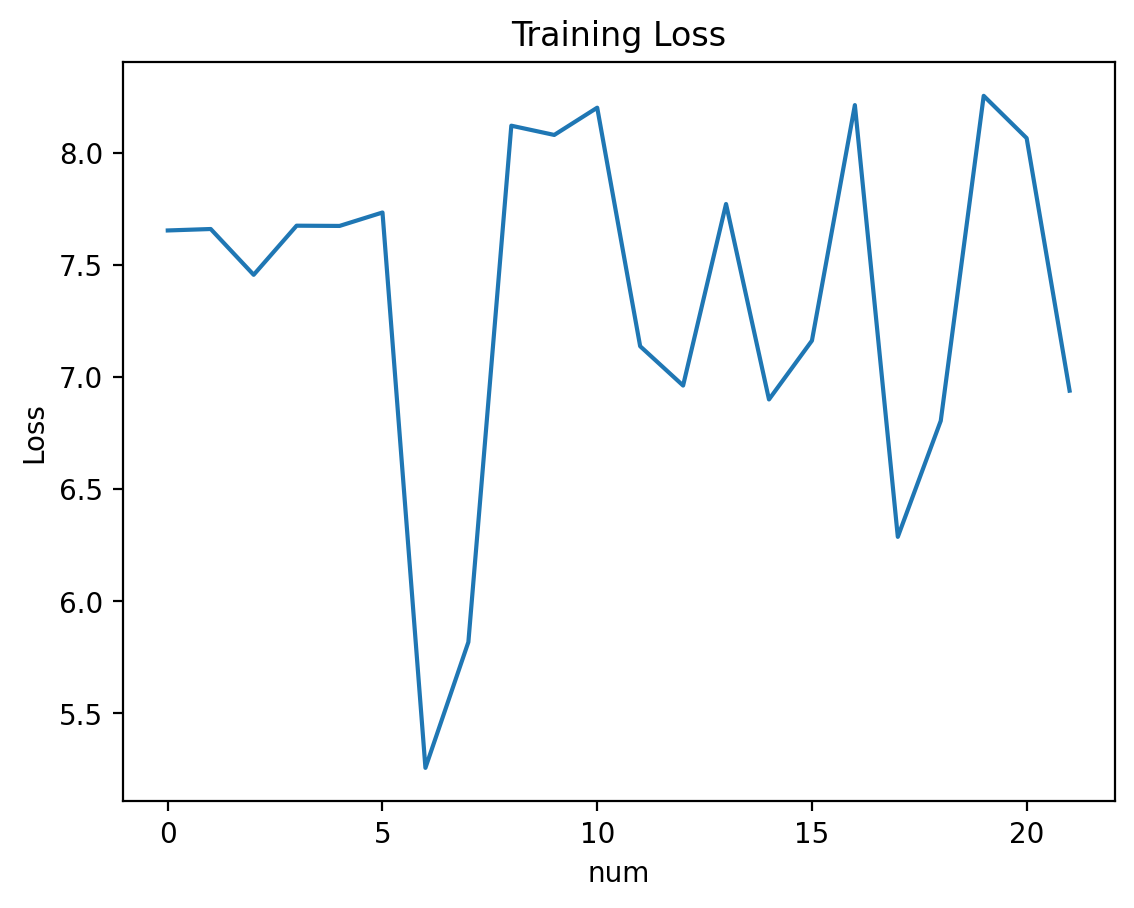

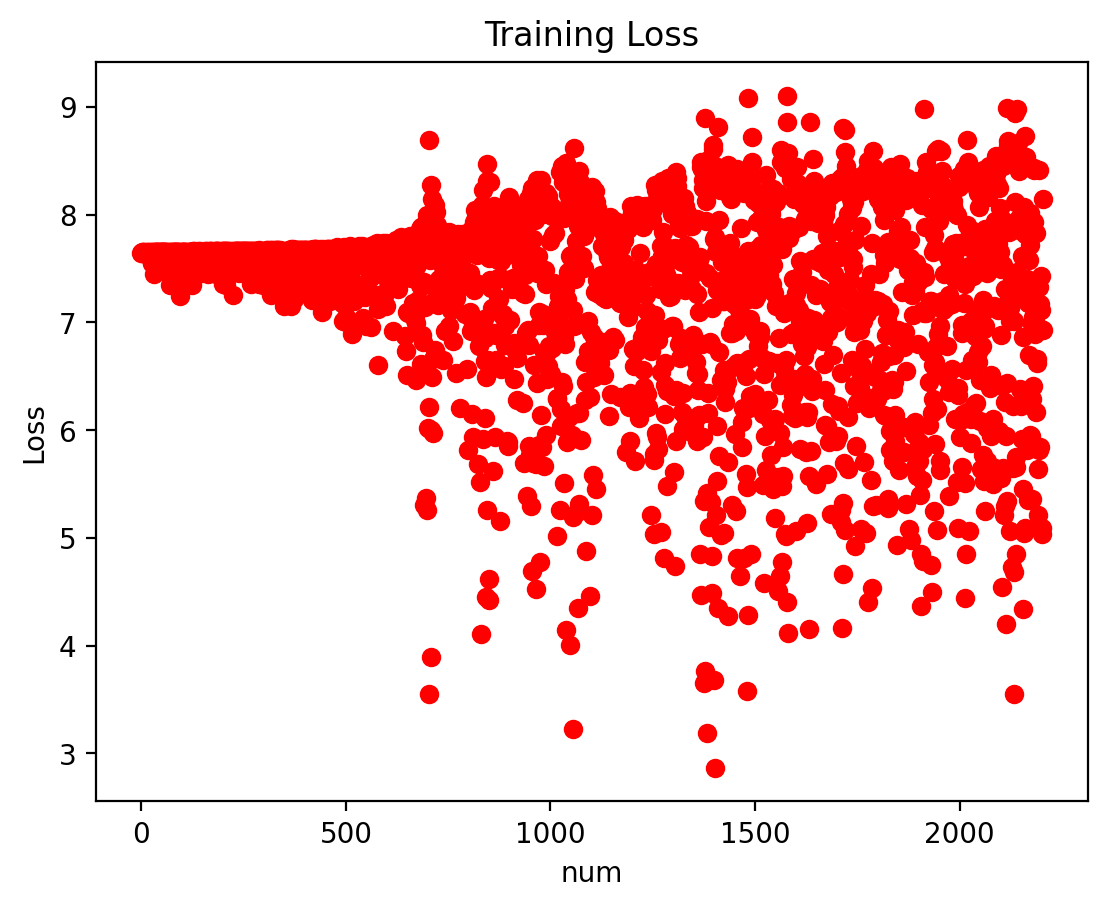

In [31]:
data = ''.join(poems)
best_params, lowest_loss = train(data, num, patience)

In [33]:
lowest_loss

2.899678366046366

In [34]:
import numpy as np
import pickle

np.save('Wxh.npy', Wxh)
np.save('Whh.npy', Whh)
np.save('Why.npy', Why)
np.save('bh.npy', bh)
np.save('by.npy', by)

with open('char_to_index.pickle', 'wb') as handle:
    pickle.dump(char_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_char.pickle', 'wb') as handle:
    pickle.dump(index_to_char, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [35]:
import numpy as np
import pickle

np.save('./peo1/Wxh.npy', Wxh)
np.save('./peo1/Whh.npy', Whh)
np.save('./peo1/Why.npy', Why)
np.save('./peo1/bh.npy', bh)
np.save('./peo1/by.npy', by)

with open('char_to_index.pickle', 'wb') as handle:
    pickle.dump(char_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_char.pickle', 'wb') as handle:
    pickle.dump(index_to_char, handle, protocol=pickle.HIGHEST_PROTOCOL)